In [32]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load data from Github

In [33]:
def str_to_float(s):
    try:
        # Parse strings with decimal (,) separators
        return float(s.replace(',','.')) if type(s) == str else s
    except ValueError:
        return None

def str_to_date(s):
    try:
        # Parse dates
        return datetime.strptime(s,'%Y-%m-%d') if type(s) == str else s
    except ValueError:
        return None

In [34]:
url = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

covid_data_df = pd.read_csv(
    url,
    converters={'total_deaths_per_million': str_to_float,
                'date': str_to_date
               },
    low_memory=False
)

## Select countries

In [35]:
# iterating the columns 
for col in covid_data_df.columns: 
    print(col)

iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
new_tests
total_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
new_vaccinations_smoothed_per_million
stringency_index
population
population_density
median_age
aged_65_older
aged_70_older
gdp_per_capita
extreme_pover

In [36]:
countries = [
'Finland',
'France',
'Italy',
'Spain',
'Sweden',
'United Kingdom',
'Israel',
'Germany'
]

covid_data_df = covid_data_df[covid_data_df['location'].isin(countries)]

In [37]:
def plot_serie(column_name, data_frame):
    plt.rcParams['figure.figsize'] = [12, 10]
    plt.rcParams['figure.dpi'] = 200

    # fig = plt.figure()
    # fig.suptitle('Death per million', fontsize=15)

    for key, grp in data_frame.groupby(['location']): 
        plt.plot(grp['date'], grp[column_name], label = key)

    plt.ylabel(column_name, fontsize=18)
    plt.xlabel('Date', fontsize=16)
    plt.legend(loc="upper left")
    plt.show()

In [38]:
starting_date = '2021-01-01'

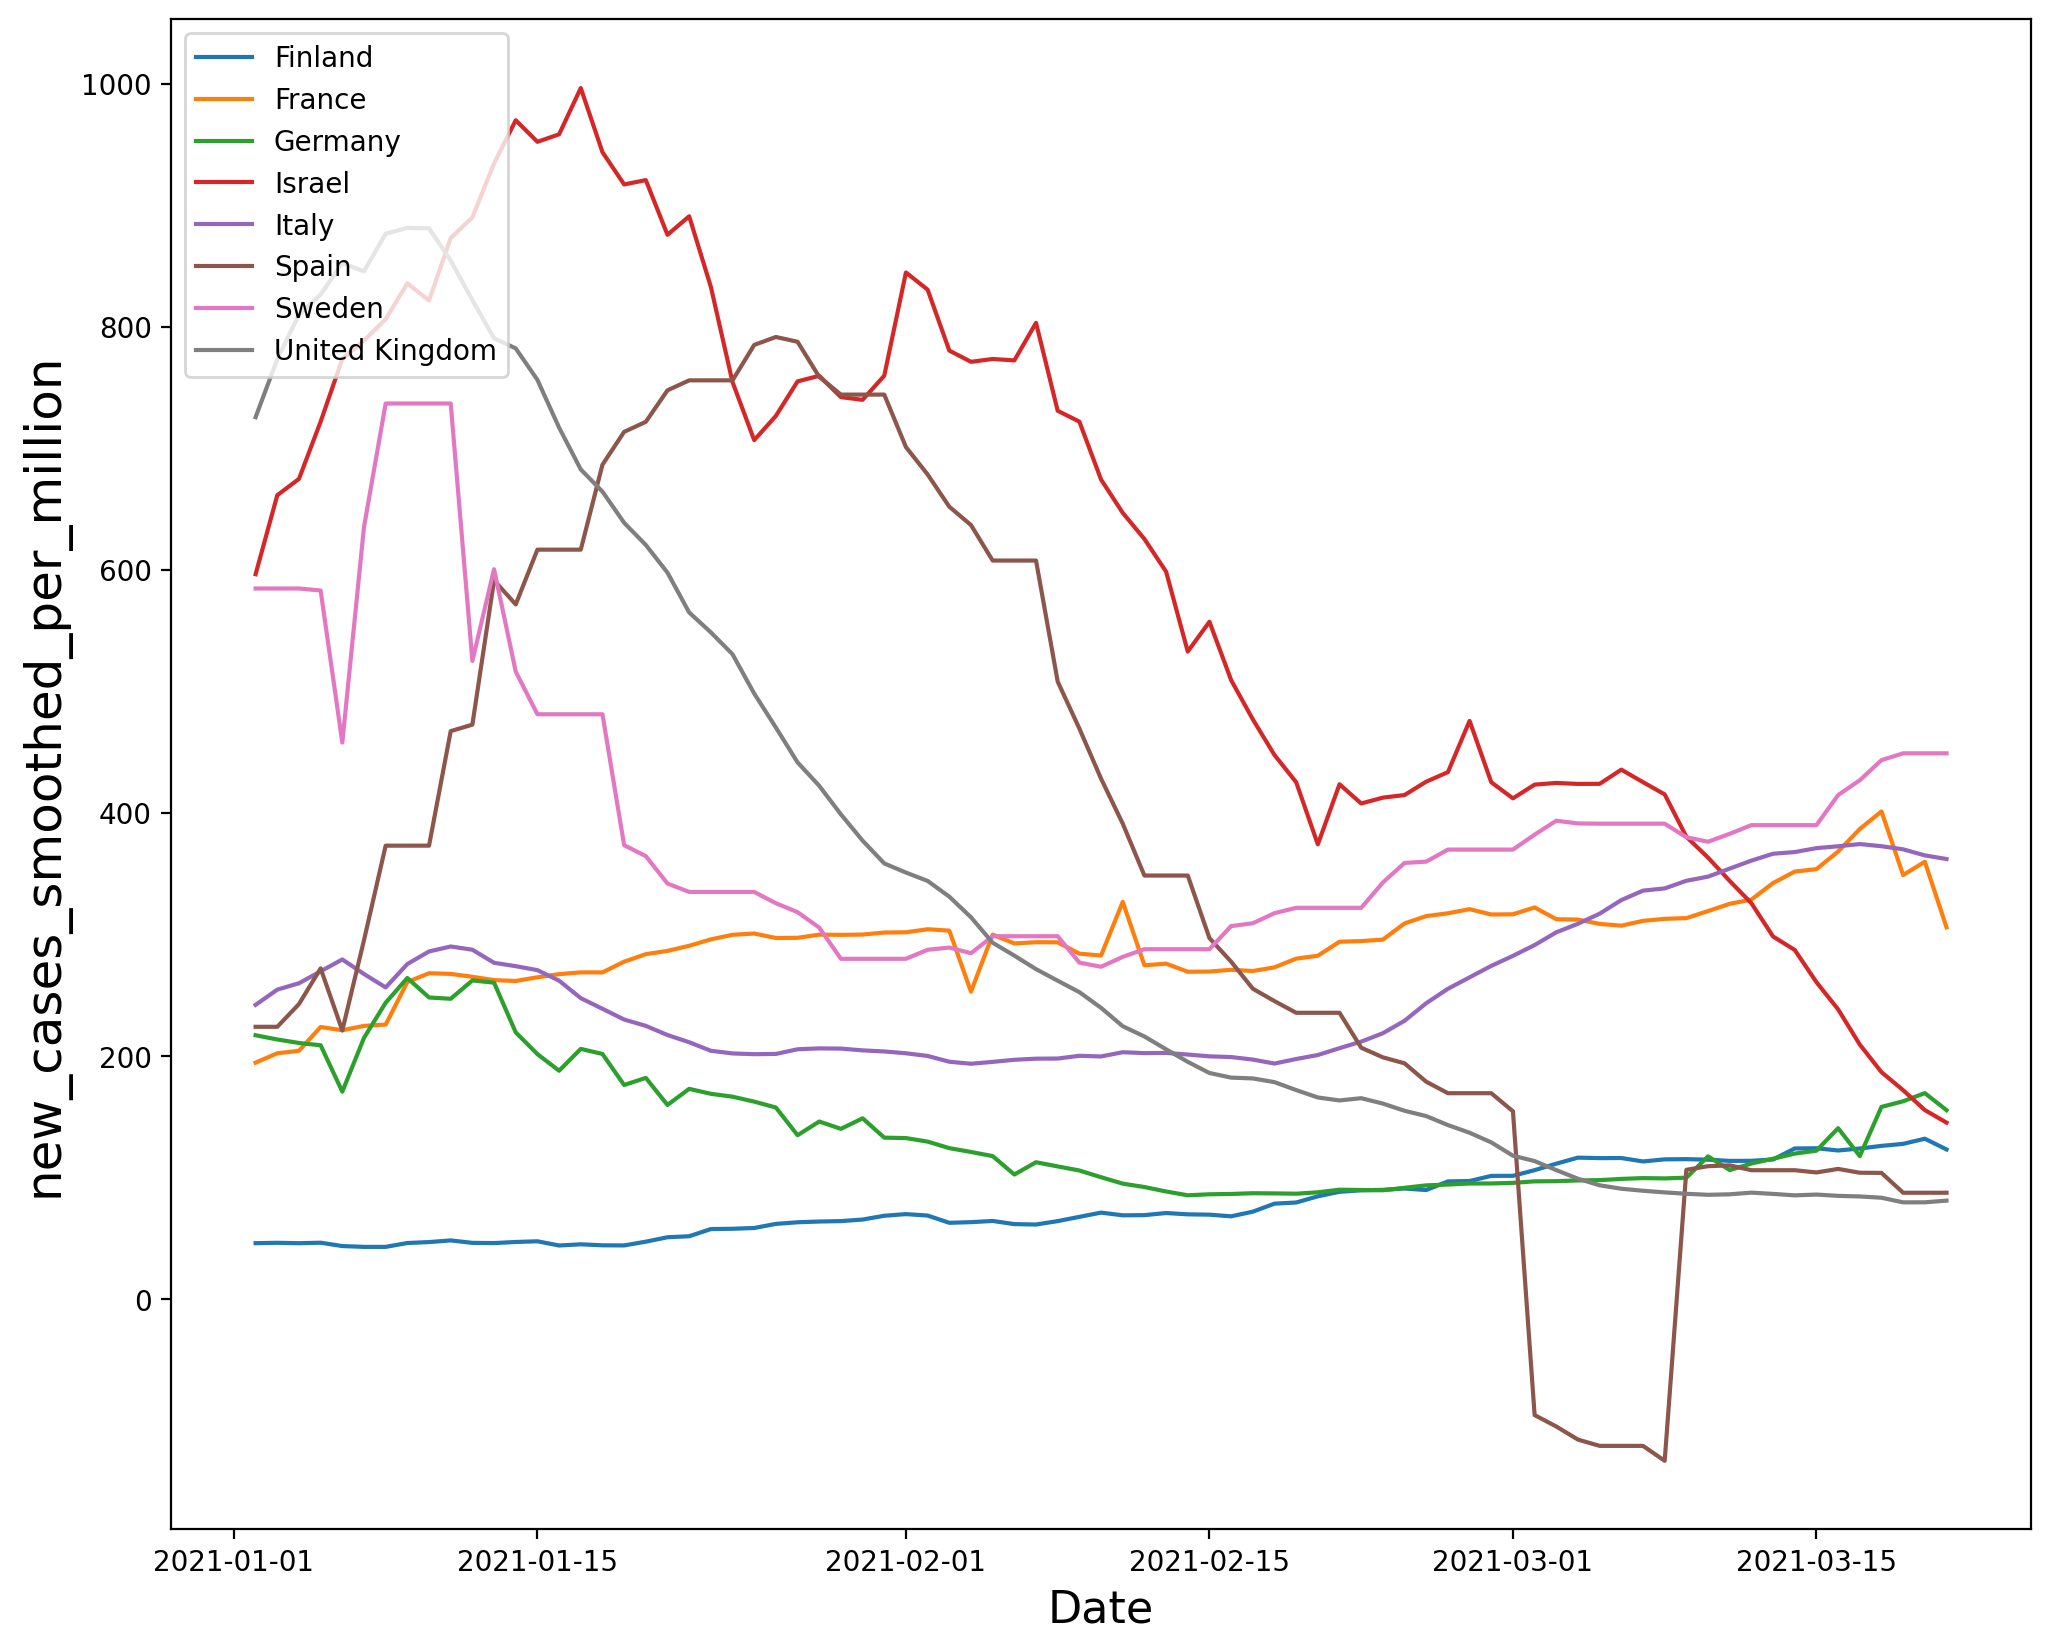

In [39]:
column_name = 'new_cases_smoothed_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > starting_date)]
plot_serie(column_name, data_frame)

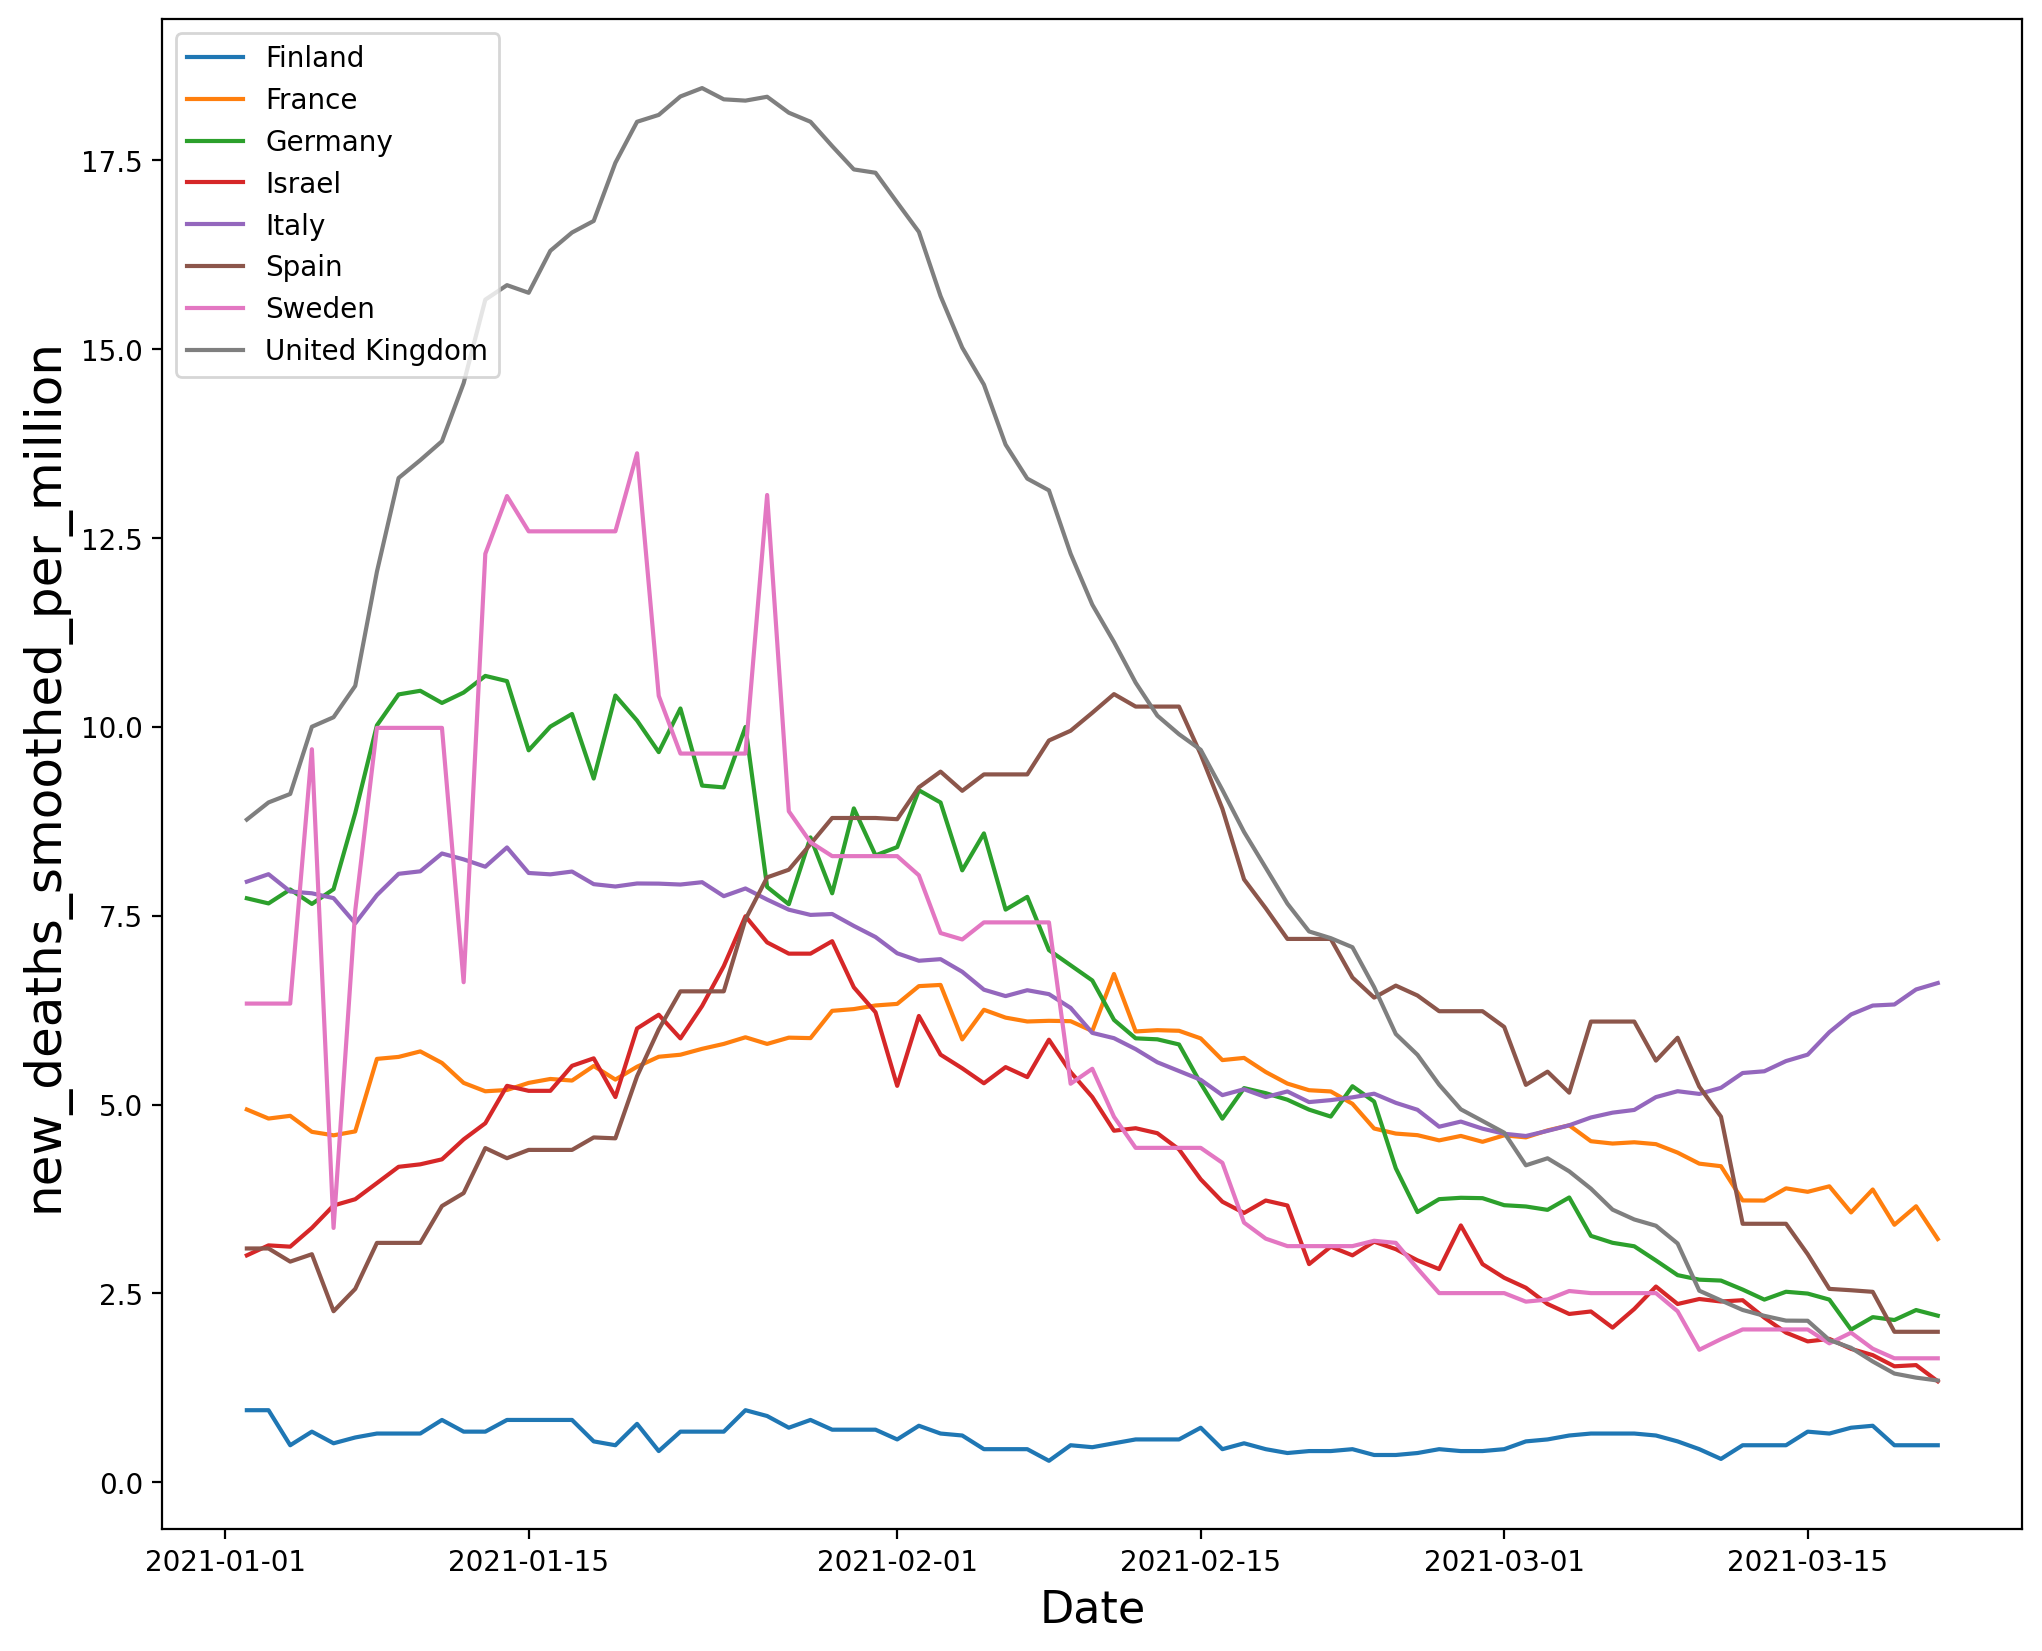

In [40]:
column_name = 'new_deaths_smoothed_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > starting_date)]
plot_serie(column_name, data_frame)

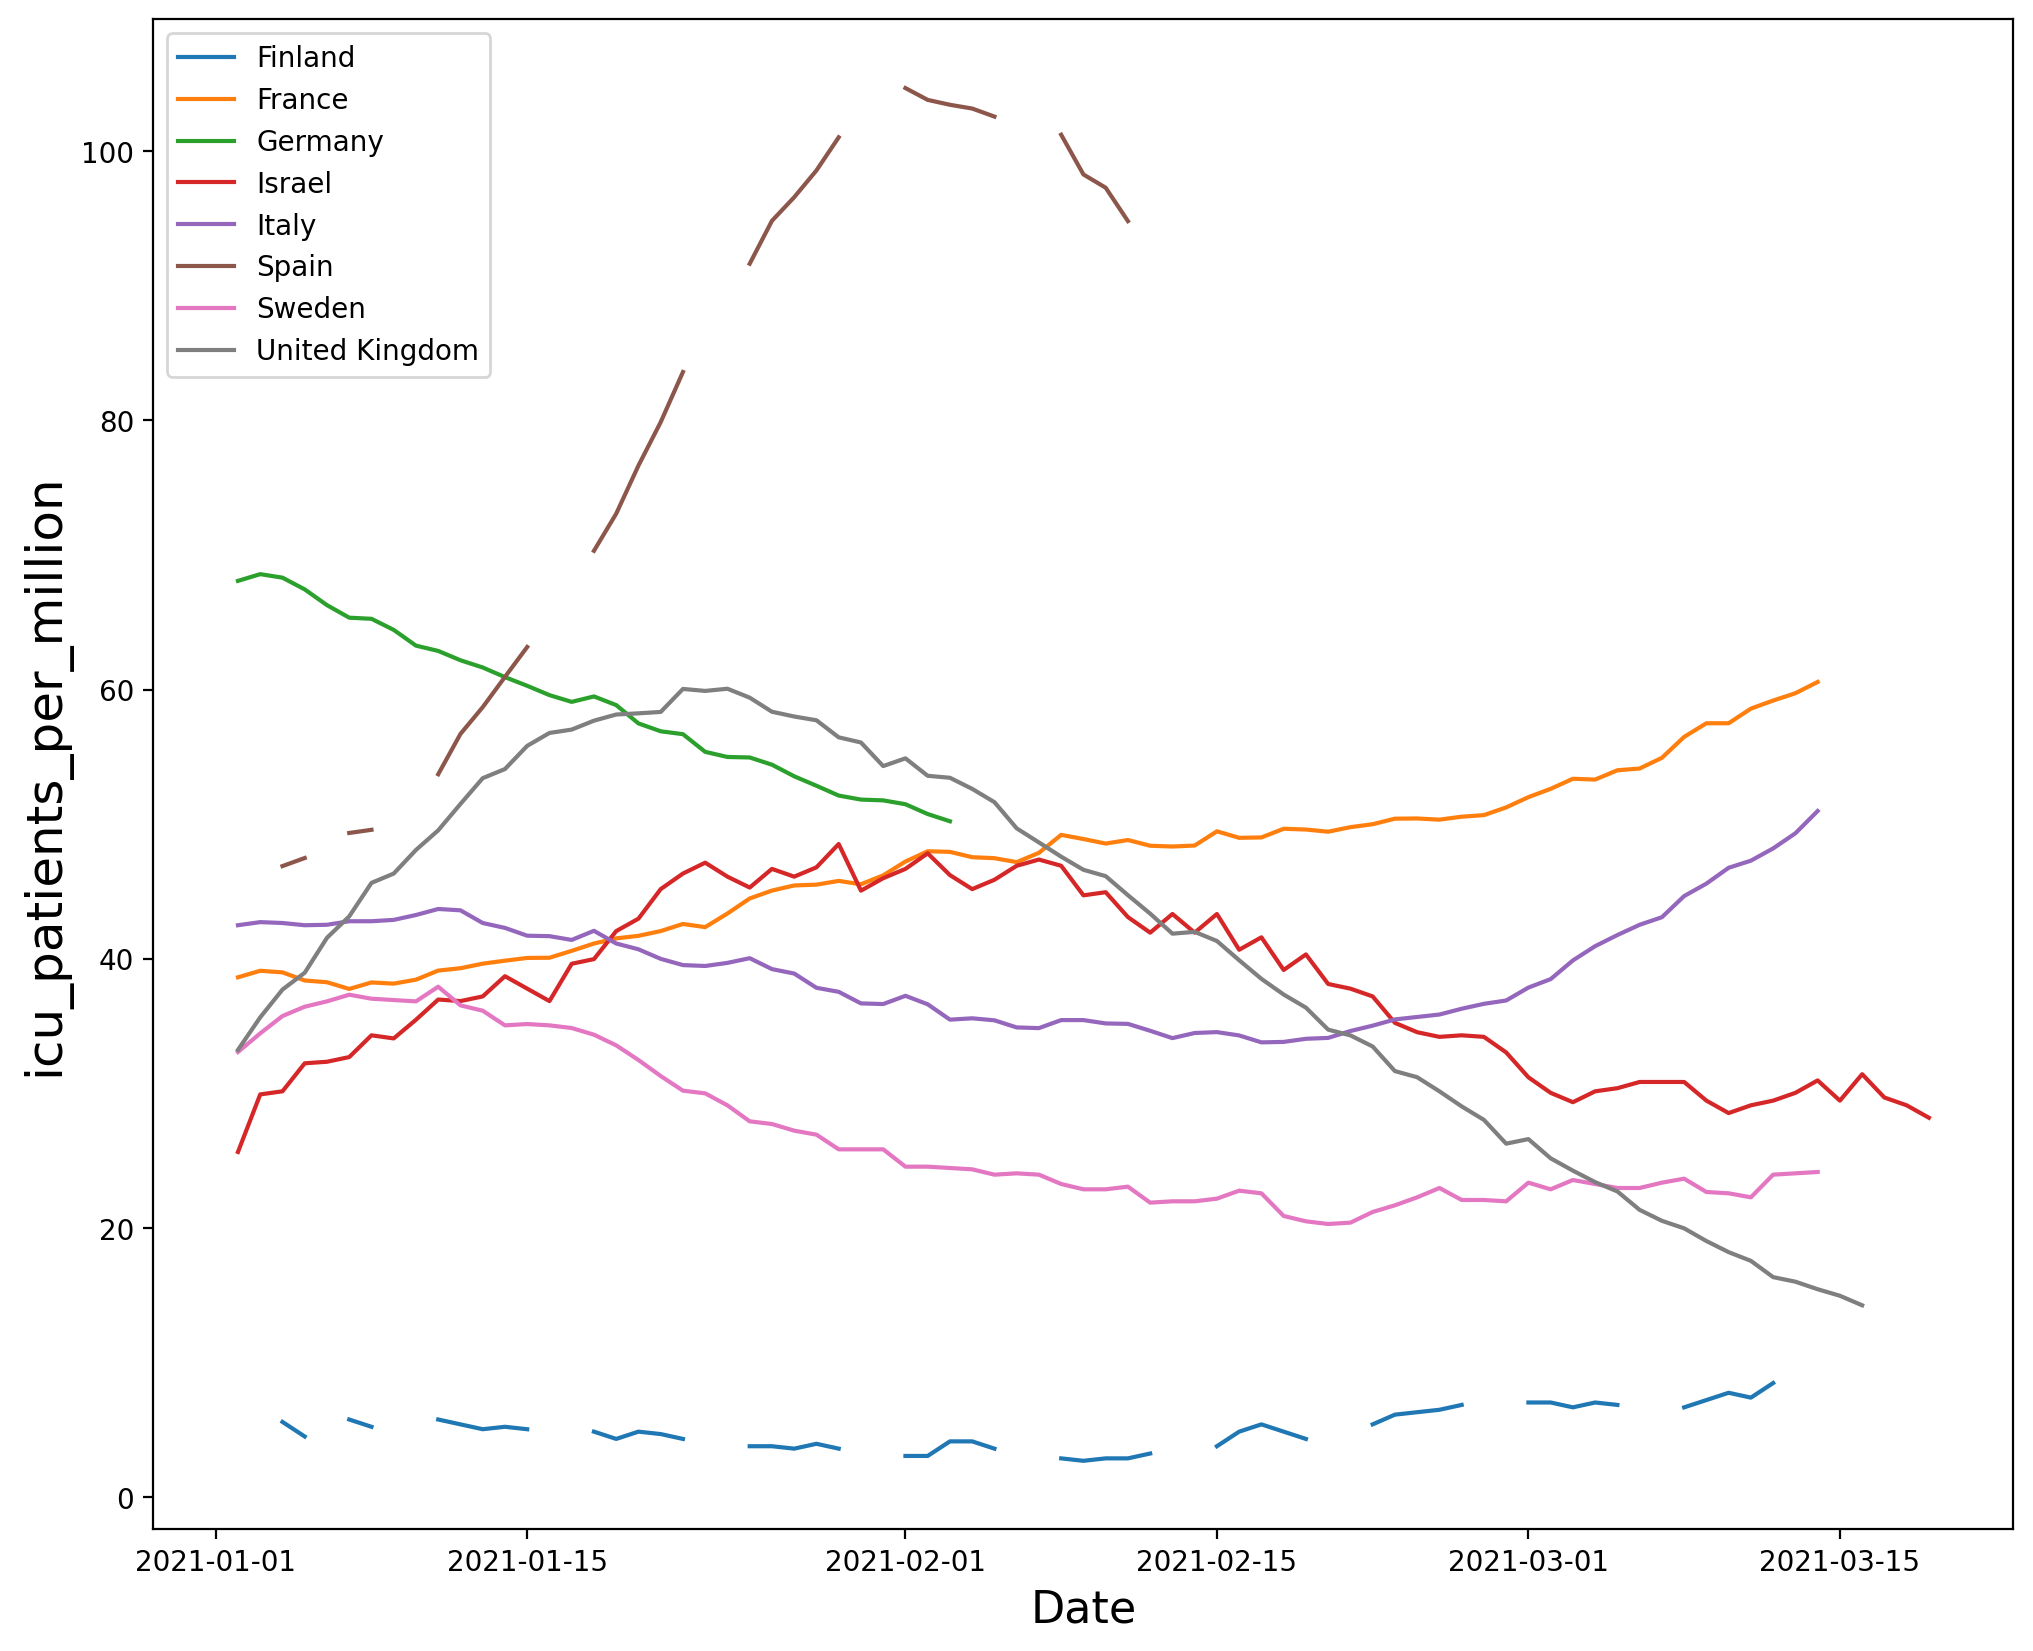

In [41]:
column_name = 'icu_patients_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > starting_date)]
plot_serie(column_name, data_frame)

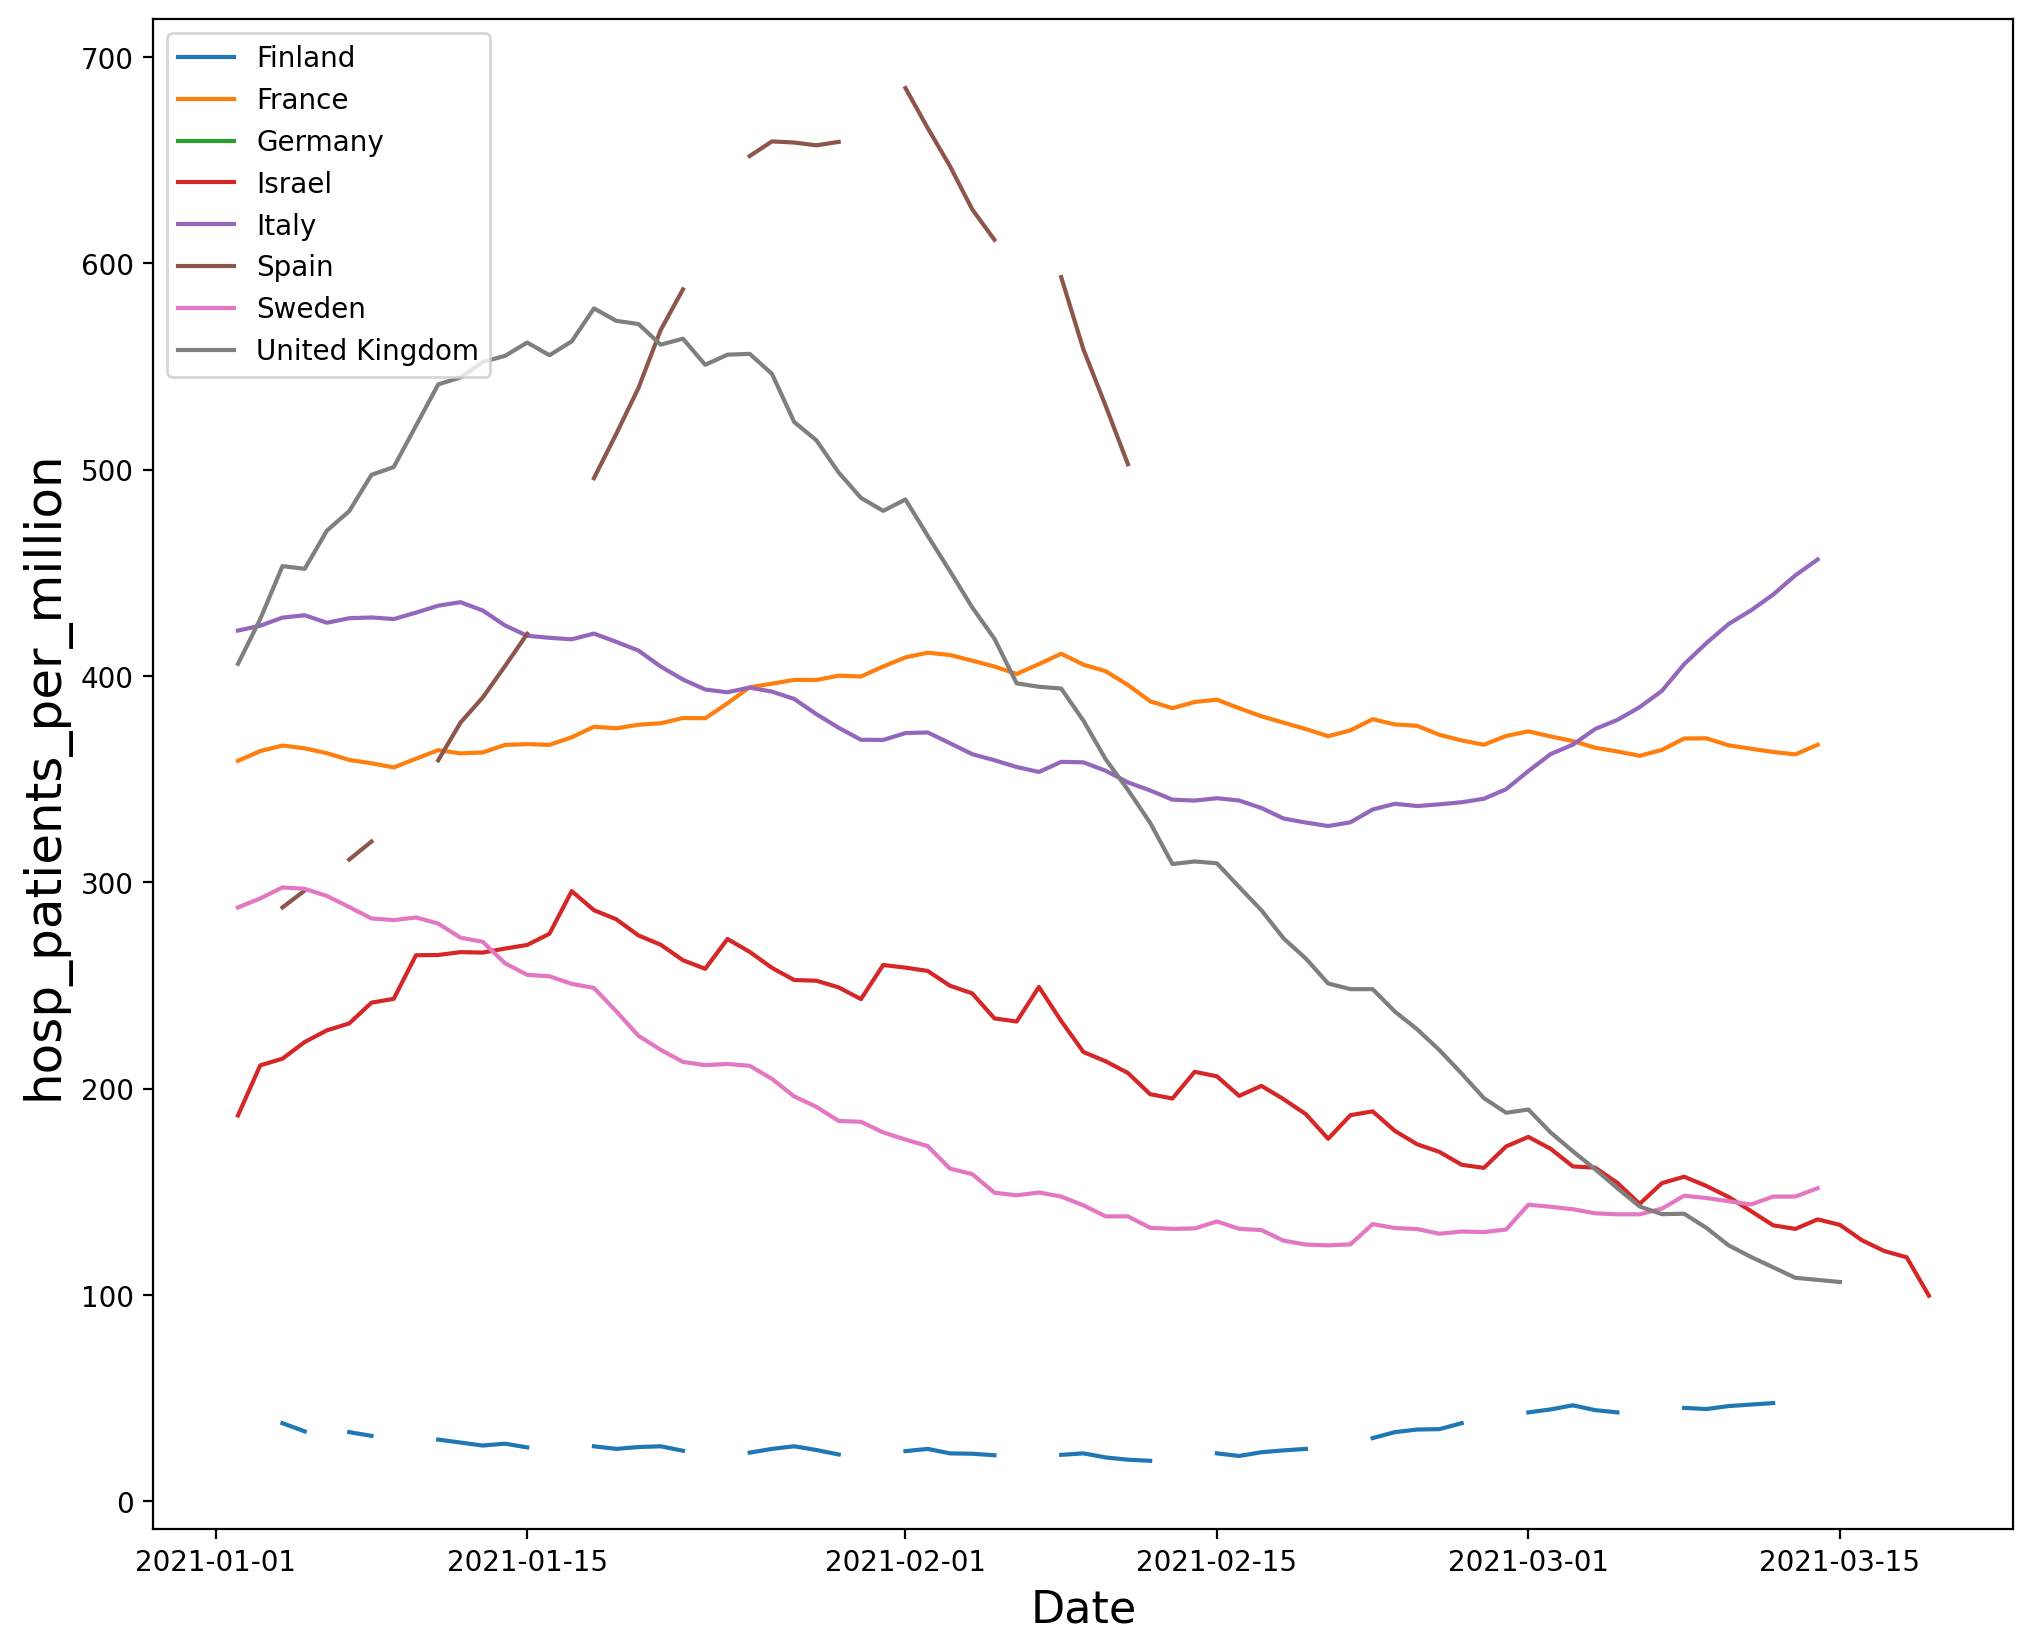

In [42]:
column_name = 'hosp_patients_per_million'
data_frame = covid_data_df[(covid_data_df['date'] > starting_date)]
plot_serie(column_name, data_frame)

In [43]:
covid_data_df_sorted = data_frame.sort_values(by='date', ascending=False).head(10)
covid_data_df_sorted

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
72435,GBR,Europe,United Kingdom,2021-03-21,4310195.0,5356.0,5497.857,126393.0,34.0,91.429,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
34206,ISR,Asia,Israel,2021-03-21,827772.0,552.0,1256.429,6092.0,10.0,11.571,...,33132.320,0.5,93.320,6.74,15.4,35.4,NaN,2.99,82.97,0.919
66582,SWE,Europe,Sweden,2021-03-21,744272.0,0.0,4535.000,13262.0,0.0,16.571,...,46949.283,0.5,133.982,4.79,18.8,18.9,NaN,2.22,82.80,0.945
24974,FIN,Europe,Finland,2021-03-21,71643.0,520.0,682.000,805.0,0.0,2.714,...,40585.721,NaN,153.507,5.76,18.3,22.6,NaN,3.28,81.91,0.938
64999,ESP,Europe,Spain,2021-03-21,3212332.0,0.0,4089.714,72910.0,0.0,93.143,...,34272.360,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56,0.904
25397,FRA,Europe,France,2021-03-21,4277786.0,603.0,20844.571,92119.0,0.0,219.429,...,38605.671,NaN,86.060,4.77,30.1,35.6,NaN,5.98,82.66,0.901
34622,ITA,Europe,Italy,2021-03-21,3376376.0,20045.0,21890.571,104942.0,300.0,399.571,...,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18,83.51,0.892
26950,DEU,Europe,Germany,2021-03-21,2670001.0,768.0,13022.714,74756.0,50.0,184.714,...,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00,81.33,0.947
24973,FIN,Europe,Finland,2021-03-20,71123.0,856.0,731.000,805.0,0.0,2.714,...,40585.721,NaN,153.507,5.76,18.3,22.6,NaN,3.28,81.91,0.938
72434,GBR,Europe,United Kingdom,2021-03-20,4304839.0,5639.0,5403.429,126359.0,96.0,94.000,...,39753.244,0.2,122.137,4.28,20.0,24.7,NaN,2.54,81.32,0.932
